# Exploratory Data Analysis

The purpose of this notebook is to examine several key questions about this data set which will allow me to better approach clustering and customer segmentation.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Eliminating a limit on the number of columns that can be viewed in a data frame
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_parquet('../Data/Cleaned_Customer_Data')

In [4]:
data.head()

,Age,Marital_status,Income,Homeowner_status,Household_comp,Household_size,Kids,CampaignsRedeemed,CampaignsSent,Percent_CampaignRedeemed,CouponRedeemed_Count,CouponSent_Count,Percent_CouponsRedeemed,TypeA,TypeB,TypeC,PercentTypeA,PercentTypeB,PercentTypeC,Count_products,Count_depts,Most_freq_dept,Least_freq_dept,Count_sub_cagtegory,Most_freq_product,Least_freq_product,High_volume_product,PercentPrivate,%_products_preferred_dept,%_purchases_product_displayed,%_purchases_product_mailer,%_baskets_product_mailer,%_baskets_product_displayed,Avg_quantity_purchased,Avg_basket_sales_value,Max_basket_sales_value,Min_basket_sales_value,Total_num_baskets,Avg_num_items,Max_num_items,Min_num_items,Avg_manu_disc,Min_manu_disc,Avg_coupon_disc,Min_coupon_disc,Avg_loyalty_disc,Max_loyalty_disc,Min_loyalty_disc,Num_stores_visited,Most_freq_store,Most_freq_time,First_active_day,Last_active_day,Recency,Frequency,Monetary,Avg_trips_week,Avg_shopping_lag
1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,2,8,0.25,5,662,0.007553,3.0,4.0,1.0,0.375000,0.5,0.125000,677,13,GROCERY,FLORAL,303,825123.0,1051883.0,856942.0,0.117545,0.652661,0.095541,0.114650,0.114650,0.095541,1.156340,50.350698,133,0,86,23.220930,62,1,-0.304070,-2.2,-0.936744,-6.84,-8.105116,0.0,-23.30,2,436.0,1456.0,51,706,5,0.120956,4330.16,1.264706,7.705882
2,0,0,0,0,0,0,0,0,1,0.00,0,209,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,546,12,GROCERY,FLORAL,299,1077555.0,864996.0,8090521.0,0.235294,0.739696,0.091036,0.109244,0.109244,0.091036,1.168067,43.429778,153,3,45,18.533333,71,1,0.000000,0.0,-0.200000,-2.50,-7.444222,0.0,-38.77,5,401.0,1904.0,103,668,43,0.063291,1954.34,1.285714,12.840909
3,0,0,0,0,0,0,0,0,3,0.00,0,417,0.000000,2.0,0.0,1.0,0.666667,0.0,0.333333,516,12,GROCERY,,220,882830.0,5978648.0,6534178.0,0.187636,0.760797,0.215835,0.235358,0.235358,0.215835,9.262473,56.451277,286,2,47,181.702128,6949,2,-0.421277,-10.6,-1.301915,-30.24,-14.365106,0.0,-79.53,3,401.0,1549.0,113,703,8,0.066104,2653.21,1.270270,12.826087
4,0,0,0,0,0,0,0,0,1,0.00,0,209,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,164,9,GROCERY,NUTRITION,110,836163.0,894503.0,6773204.0,0.152824,0.554054,0.083056,0.066445,0.066445,0.083056,1.269103,40.003667,126,2,30,12.733333,53,1,0.000000,0.0,-0.083333,-2.50,-3.855000,0.0,-27.41,6,298.0,1452.0,104,627,84,0.042194,1200.11,1.153846,18.034483
5,0,0,0,0,0,0,0,0,0,0.00,0,0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,199,9,GROCERY,PASTRY,125,1002499.0,1009449.0,13986405.0,0.216216,0.380793,0.139640,0.108108,0.108108,0.139640,1.103604,19.476500,60,0,40,6.125000,22,1,0.000000,0.0,0.000000,0.00,-2.958250,0.0,-20.61,3,374.0,1540.0,85,703,8,0.056259,779.06,1.481481,15.846154


### Questions to be explored:

- Number of households in each of the demographic categories (Age, Marital Status, Income, Homeowner status, Houshold Comp/Size, Kids)

- How to best fill in null values for demographic categories?  These were filled automatically by the SQL queries as 0.

- Create a correlation heatmap of non-categorical features - which exhibit strong positive or negative correlation?

- How does the income range affect monetary value to the store, and the average sales value of each basket?

- How does having children change spending habits?  More frequency and lower sales value?

- How is frequency related to the avaerage sales value?

- What does the relationship between # or % of coupons redeemed and average sales value and monetary value look like?

- Is there a significant difference between # or % of campaigns redeemed by household? (testing for colinearity)

- What does the percent of TypeA campaigns look like in relation to the % of coupons redeemd?

- How do private brand shoppers spend money differently?  Higher or lower average sales value/frequency?

- How does the average shopping lag relate to the average basket value?

- How does % of purchased on display in store relate to % of purchases on display in the mailers?

- Is there significant difference between the % of purchases on display vs % of baskets with an item on display?

## Demographic distribution of categories

I have quite a few households with 'null' values for each category which were filled in with '0' in an earlier notebook when extracting the data from SQL. 

Here I need to explore the distribution of these categories across these households, and decide if and how to impute the missing values. 

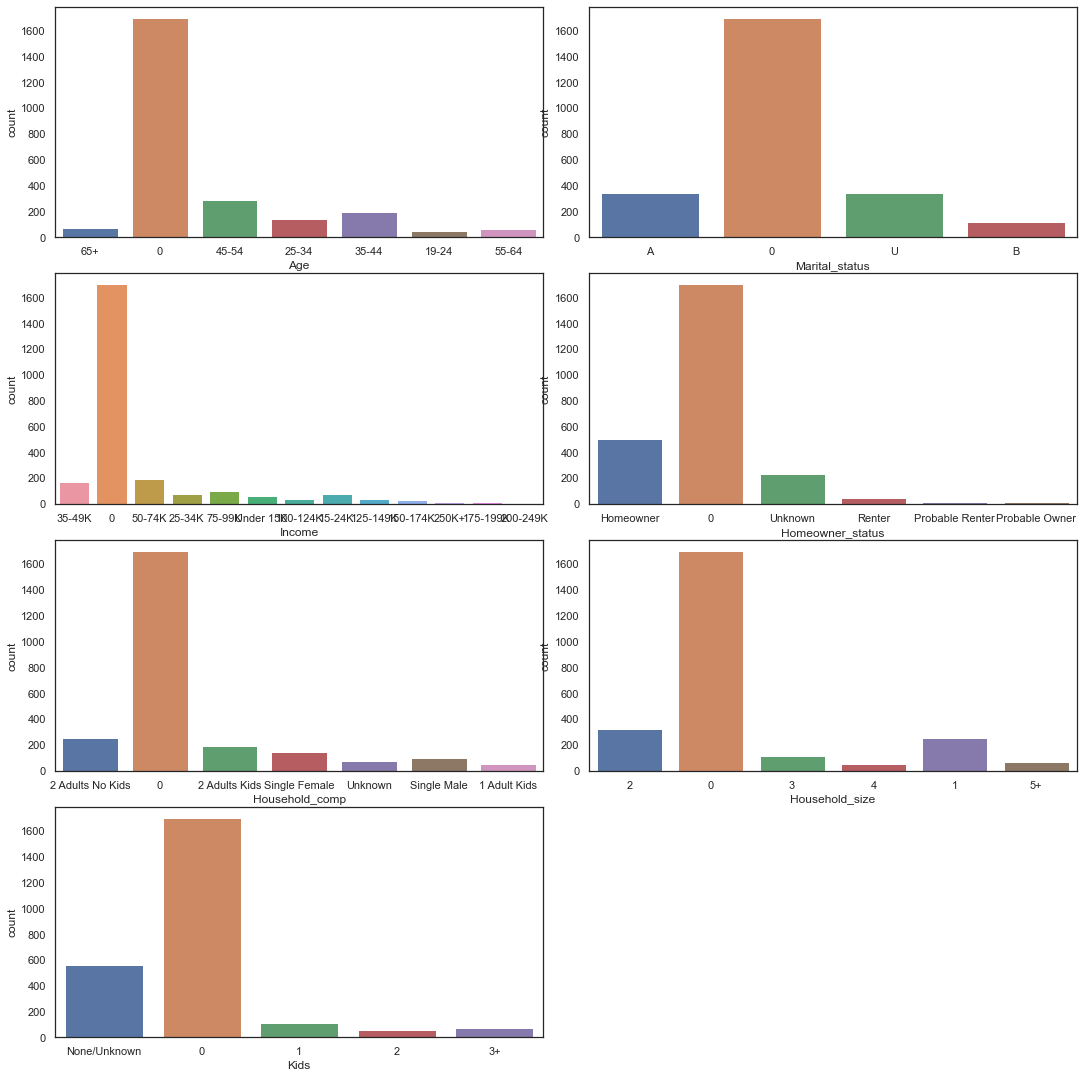

In [27]:
# Plots the count of each unique value for each column of demographic information
fig, axes = plt.subplots(4,2, figsize=(15,15))
fig.tight_layout()
fig.delaxes(axes[3,1])
sns.countplot(x='Age', data=data, ax=axes[0,0])
sns.countplot(x='Marital_status', data=data, ax=axes[0,1])
sns.countplot(x='Income', data=data, ax=axes[1,0])
sns.countplot(x='Homeowner_status', data=data, ax=axes[1,1])
sns.countplot(x='Household_comp', data=data, ax=axes[2,0])
sns.countplot(x='Household_size', data=data, ax=axes[2,1])
sns.countplot(x='Kids', data=data, ax=axes[3,0]);

It seems we have a problem with missing values for demographic data, and unfortunately this is information that we absolutely have to have in order to do customer segmentation and clustering with any degree of accuracy so I'm going to drop the rows in which demographic data is missing. 

In [5]:
print('Number of households with no income information: ', len(data['Income'][data['Income']=='0']))
print('Number of households with no age information: ', len(data['Age'][data['Age']=='0']))
print('Number of households with no marital information: ', len(data['Marital_status'][data['Marital_status']=='0']))
print('Number of households with no homeowner information: ', len(data['Homeowner_status'][data['Homeowner_status']=='0']))
print('Number of households with no household information: ', len(data['Household_comp'][data['Household_comp']=='0']))
print('Number of households with no size information: ', len(data['Household_size'][data['Household_size']=='0']))
print('Number of households with no kid information: ', len(data['Kids'][data['Kids']=='0']))

Number of households with no income information:  1699
Number of households with no age information:  1699
Number of households with no marital information:  1699
Number of households with no homeowner information:  1699
Number of households with no household information:  1699
Number of households with no size information:  1699
Number of households with no kid information:  1699


So there are 1699 households with no demographic information, it's likely that these are all the same households but I need to check first 

In [6]:
# Creating a dictionary of indexes for each demographic column where there is no value (value is == '0')
drop = {}    
column = ['Age', 'Marital_status', 'Income', 'Homeowner_status', 'Household_comp',
       'Household_size', 'Kids']
for y in column:
    drop[y] = []
    for i in data.index:
        if data.loc[i,y] == '0':
            drop[y].append(i)

In [7]:
age = set(drop['Age'])
marital = set(drop['Marital_status'])
income = set(drop['Income'])
home = set(drop['Homeowner_status'])
house = set(drop['Household_comp'])
size = set(drop['Household_size'])
kids = set(drop['Kids'])

drop_list = list((age & marital & income & home & house & size & kids))
len(drop_list)

1699

It seems that the same 1699 households all have no demographic information, and thus will be dropped from this data set.  If information is found later that can be added in and updated for the clustering model.

In [8]:
new_data = data.drop(index=drop_list)

In [9]:
new_data.shape

(801, 58)

In [10]:
new_data.describe()

,CampaignsRedeemed,CampaignsSent,Percent_CampaignRedeemed,CouponRedeemed_Count,CouponSent_Count,Percent_CouponsRedeemed,TypeA,TypeB,TypeC,PercentTypeA,PercentTypeB,PercentTypeC,Count_products,Count_depts,Count_sub_cagtegory,Most_freq_product,Least_freq_product,High_volume_product,PercentPrivate,%_products_preferred_dept,%_purchases_product_displayed,%_purchases_product_mailer,%_baskets_product_mailer,%_baskets_product_displayed,Avg_quantity_purchased,Avg_basket_sales_value,Max_basket_sales_value,Min_basket_sales_value,Total_num_baskets,Avg_num_items,Max_num_items,Min_num_items,Avg_manu_disc,Min_manu_disc,Avg_coupon_disc,Min_coupon_disc,Avg_loyalty_disc,Max_loyalty_disc,Min_loyalty_disc,Num_stores_visited,Most_freq_store,Most_freq_time,First_active_day,Last_active_day,Recency,Frequency,Monetary,Avg_trips_week,Avg_shopping_lag
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,8.010000e+02,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.846442,5.259675,0.140955,2.317104,541.489388,0.003966,2.720350,2.087391,0.451935,0.569638,0.318591,0.060585,880.600499,15.634207,353.611735,1.059259e+06,4.414494e+06,5.231906e+06,0.284091,0.631752,0.102444,0.161255,0.161255,0.102444,107.664669,36.912914,170.099875,0.836454,175.204744,1064.614325,11924.777778,1.063670,-0.045548,-1.245755,-0.227063,-5.900487,-6.367465,-0.003296,-40.768639,6.394507,3071.972534,1577.602996,65.399501,703.550562,7.449438,0.246420,5615.126417,2.342651,5.265275
std,1.482444,3.203121,0.226266,4.998182,240.851386,0.009099,1.323517,2.019246,0.763544,0.288331,0.243109,0.106262,448.657105,2.979896,126.278770,1.059476e+06,4.506218e+06,2.480983e+06,0.104974,0.100107,0.043057,0.064381,0.064381,0.043057,162.566941,20.906013,87.881909,1.876691,130.901673,1388.357558,9745.448009,0.468712,0.121755,1.773538,0.421772,6.979284,3.955288,0.062311,21.105269,3.914610,8818.042566,408.546711,34.998289,17.288587,17.288587,0.184109,3750.938675,1.350268,3.253922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,164.000000,7.000000,70.000000,2.765800e+04,3.244000e+04,5.224000e+04,0.056701,0.277778,0.000000,0.000000,0.000000,0.000000,1.069016,2.828903,21.000000,0.000000,22.000000,2.826923,10.000000,1.000000,-1.812045,-15.400000,-4.248583,-74.890000,-35.052456,-1.620000,-157.610000,1.000000,286.000000,12.000000,1.000000,556.000000,0.000000,0.030942,646.400000,1.023810,0.492142
25%,0.000000,3.000000,0.000000,0.000000,407.000000,0.000000,2.000000,0.000000,0.000000,0.375000,0.000000,0.000000,546.000000,14.000000,264.000000,8.296170e+05,1.005921e+06,5.569230e+06,0.209034,0.574468,0.071222,0.117409,0.117409,0.071222,1.546977,21.669865,111.000000,0.000000,96.000000,31.513761,119.000000,1.000000,-0.038525,-1.600000,-0.235153,-7.400000,-8.109405,0.000000,-50.370000,3.000000,333.000000,1302.000000,34.000000,704.000000,1.000000,0.135021,2970.100000,1.591549,3.051948
50%,0.000000,5.000000,0.000000,0.000000,595.000000,0.000000,3.000000,2.000000,0.000000,0.555556,0.333333,0.000000,803.000000,16.000000,344.000000,8.565240e+05,1.123194e+06,6.534178e+06,0.276230,0.640962,0.096165,0.150867,0.150867,0.096165,43.518113,32.297009,156.000000,0.000000,139.000000,429.464912,12952.000000,1.000000,-0.008498,-0.500000,-0.091743,-3.840000,-5.620148,0.000000,-36.810000,6.000000,372.000000,1632.000000,70.000000,709.000000,2.000000,0.195499,4676.430000,1.968254,4.559701
75%,1.000000,7.000000,0.250000,2.000000,667.000000,0.003741,3.000000,3.000000,1.000000,0.750000,0.500000,0.125000,1104.000000,18.000000,432.000000,9.268230e+05,6

It seems that while this eliminated any households for which we had no demographic information, it did not remove several of the other issues around households with excessive purchasing patterns (potential corporate clients).  

I'll need to further explore those patterns still, as well as the other questions I previously outlined

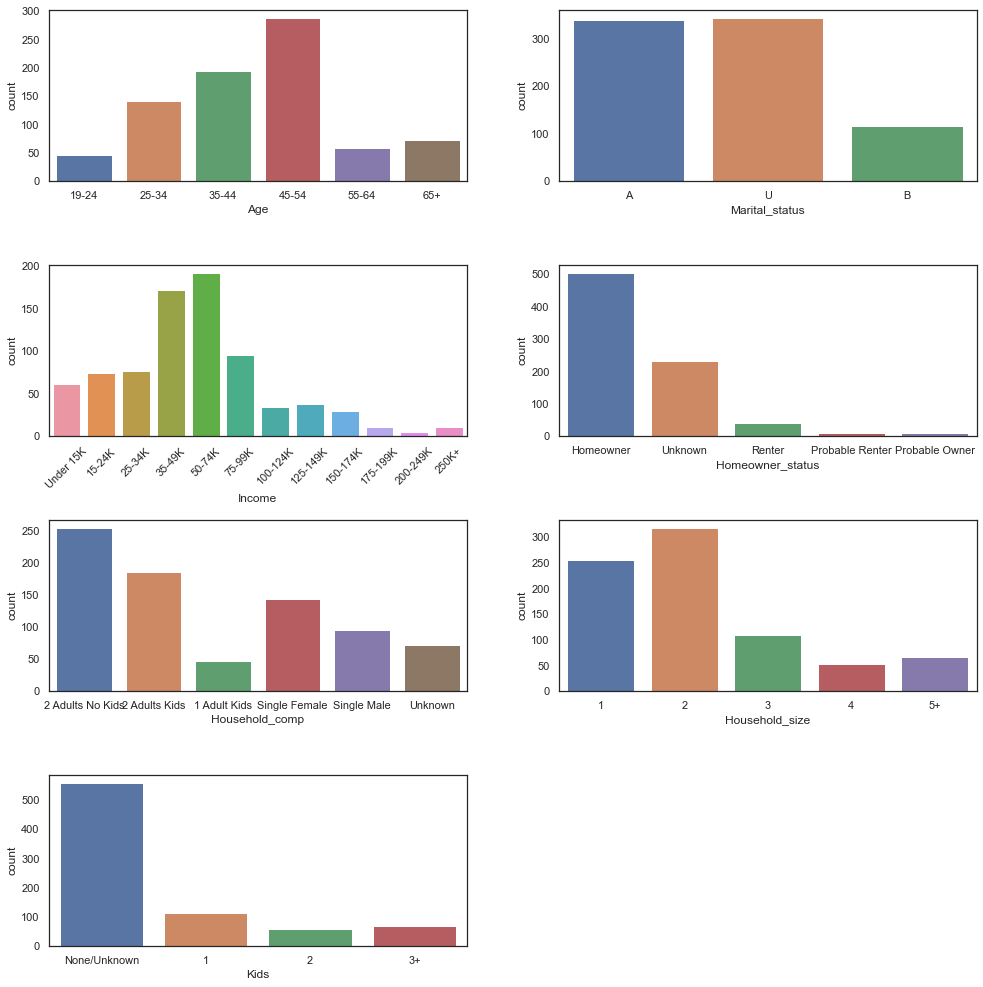

In [28]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
fig.tight_layout(pad=5.0)
fig.delaxes(axes[3,1])
sns.countplot(x='Age', data=new_data, ax=axes[0,0], order=['19-24', '25-34', '35-44', '45-54', '55-64', '65+'])
sns.countplot(x='Marital_status', data=new_data, ax=axes[0,1])
sns.countplot(x='Income', data=new_data, ax=axes[1,0], order=['Under 15K','15-24K','25-34K','35-49K','50-74K','75-99K'
                                                             , '100-124K', '125-149K', '150-174K','175-199K', 
                                                             '200-249K', '250K+'])
axes[1,0].set_xticklabels(['Under 15K','15-24K','25-34K','35-49K','50-74K','75-99K', '100-124K', '125-149K', 
                           '150-174K','175-199K', '200-249K', '250K+'], rotation = 45)
sns.countplot(x='Homeowner_status', data=new_data, ax=axes[1,1])
sns.countplot(x='Household_comp', data=new_data, ax=axes[2,0], order=['2 Adults No Kids', '2 Adults Kids', 
                                                                      '1 Adult Kids', 'Single Female', 'Single Male',
                                                                      'Unknown'])
sns.countplot(x='Household_size', data=new_data, ax=axes[2,1], order =['1','2', '3', '4','5+'])
sns.countplot(x='Kids', data=new_data, ax=axes[3,0]);

It seems that the majority of the households which we are examining are homeowning adults with no kids, who earn between 35-100K per year and are between the ages of 35 and 55.  

This seems to indicate that families with children may make a good segment to examine IF their purchasing habits differ significantly. 

### Correlation between numerical features

Prior to executing on a heatmap I need to verify that the data types are correctly set. 

In [12]:
new_data = new_data.astype({'Most_freq_product':'str', 'Least_freq_product':'str', 
                 'High_volume_product':'str', 'Most_freq_store':'str', 'Most_freq_time':'str',
                'Most_freq_dept':'str', 'Least_freq_dept':'str'});
# I'm also going to switch the discount columns to positive values (indicating the absolute value of the discount)

In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 2499
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            801 non-null    object 
 1   Marital_status                 801 non-null    object 
 2   Income                         801 non-null    object 
 3   Homeowner_status               801 non-null    object 
 4   Household_comp                 801 non-null    object 
 5   Household_size                 801 non-null    object 
 6   Kids                           801 non-null    object 
 7   CampaignsRedeemed              801 non-null    int64  
 8   CampaignsSent                  801 non-null    int64  
 9   Percent_CampaignRedeemed       801 non-null    float64
 10  CouponRedeemed_Count           801 non-null    int64  
 11  CouponSent_Count               801 non-null    int64  
 12  Percent_CouponsRedeemed        801 non-null    fl

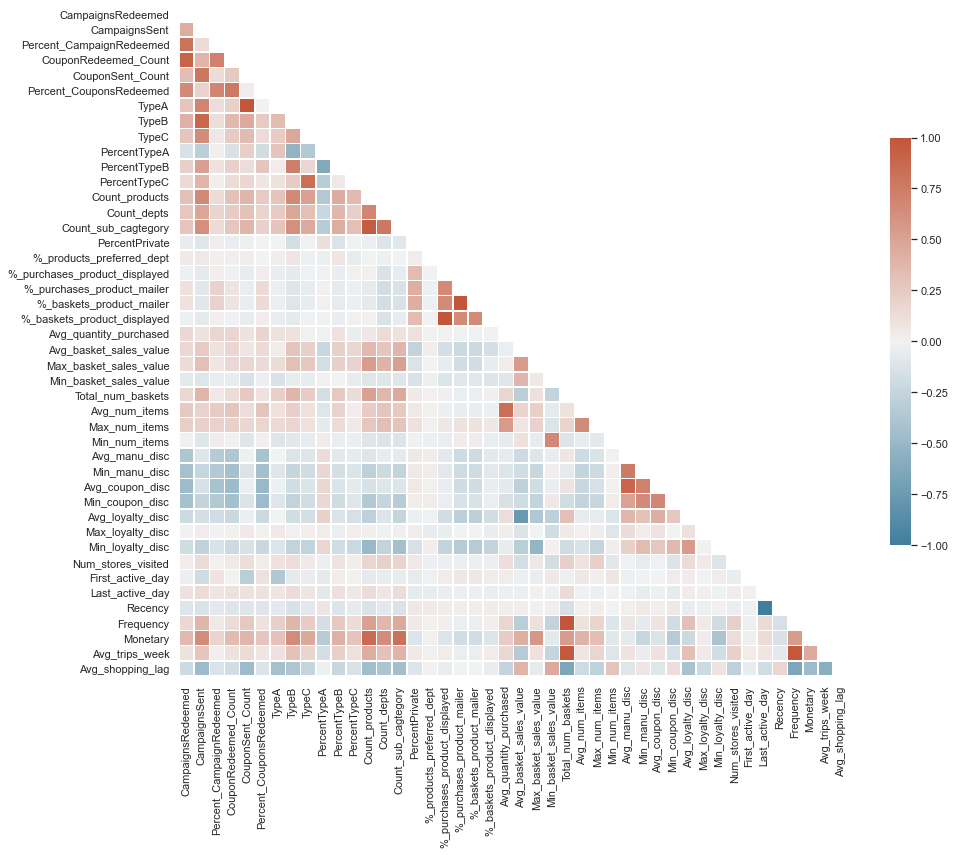

In [25]:
plt.figure(figsize=(15,15))
sns.set_theme(style='white')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr=new_data.corr()
sns.heatmap(data=corr, mask=np.triu(corr), cmap=cmap, square=True, 
           linewidths=.5, cbar_kws={"shrink": .5});

#### Interesting notes from feature correlation:

1. Last_active_day and Recency are perfectly negatively correlated - I'll drop Last_active_day since Recency will be used for RFM analysis

2. Avg_loyalty_disc is strongly correlated with Avg_basket_sales_value, far more so than the other discount features. This indicates that as specifically loyalty discounts grow for a customer that the actual sales value of thier baskets increase for the store.  This is a relationship that I want to look at in more detail later. 

3. %_baskets_product_mailer and display is perfectly correlated with %_purchases_product_mailer and displayed.  I'll drop the baskets features here. 

4. It's notable that Max_num_items is much more strongly correlated to Av_num_items than Min_num_items, and not strongly correlated with the Avg_basket_sales_value at all.  It is likely that this is a result of several households making excessively large purchases. 

5. The percentage of purchases made from a Private brand (vs National) shows little correlation to any features except for the percentage of products purchased that were prominently displayed in the store or in the mailers.  This could indicate that households which are more likely to purchase from a Private brand are also influenced by marketing and merchandising efforts. 

6. Finally, the amount of campaigns sent to households was strongly associated with the number of distinct products households purchased, as well as with their monetary score.  This indicates that all the junk mail we receive is actually effective for the companies sending them out. 

In [36]:
# Creates a new dataframe that lables correlations as high mid or low for use later on

def himidlow(x):
    z = np.abs(x)
    if z < 0.65: return 'low'
    elif z >=0.65 and z < 0.85: return 'mid'
    elif z >= 0.85: return 'high'
    
Thresholds = corr.applymap(himidlow)
Thresholds.to_csv('../Data/Correlation_Thresholds')

### Pairwise relationships

Next I'm going to look at how different features of this data set interact with one another.

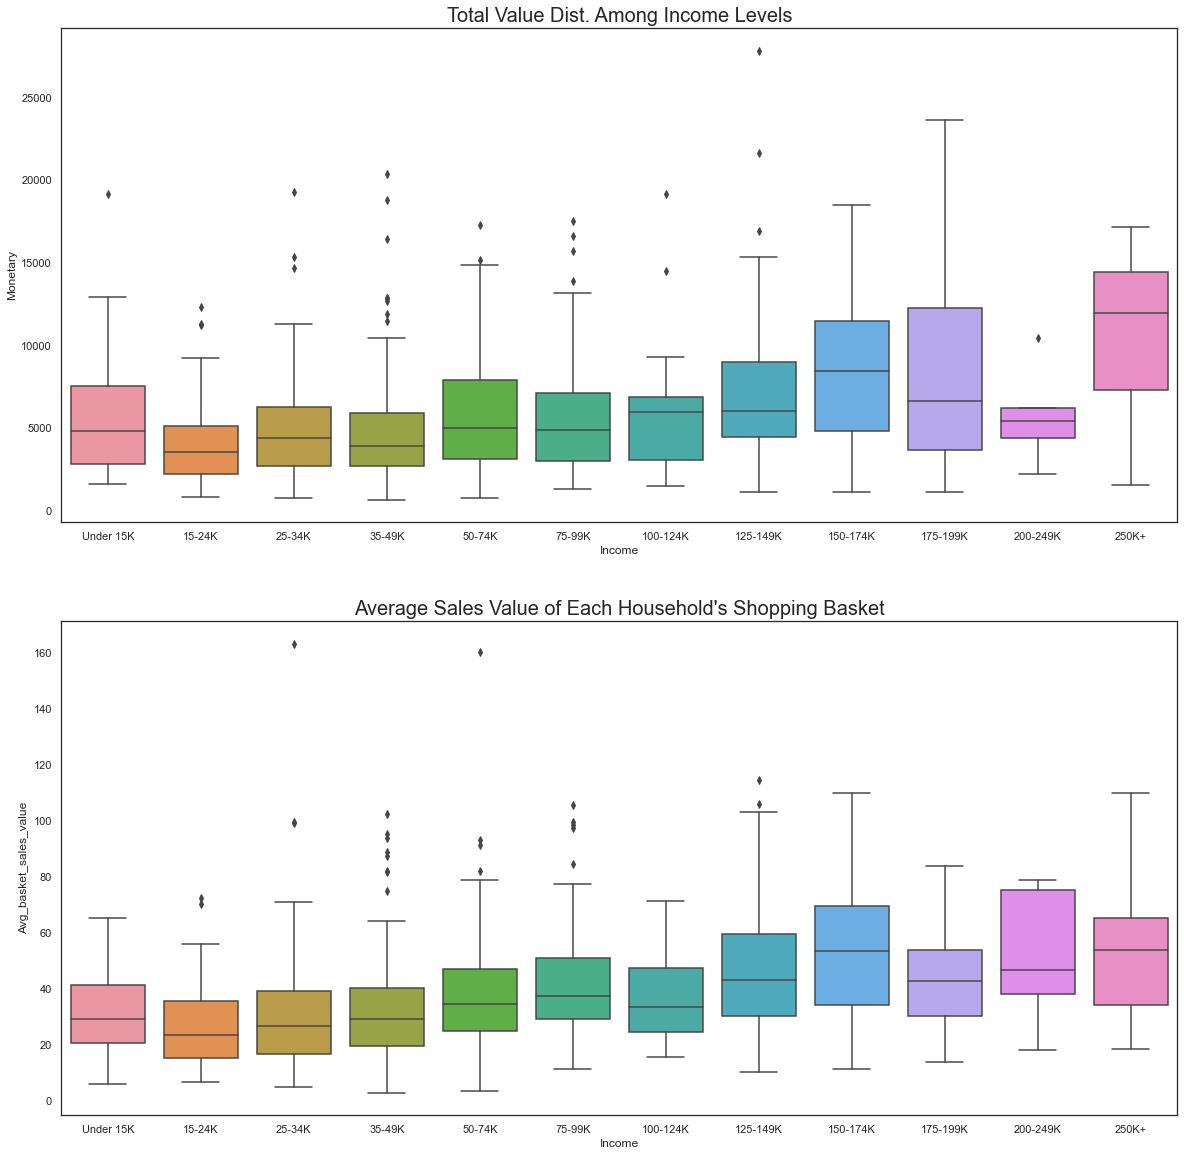

In [15]:
# Examining how income level affects both monetary value and average basket sales value
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,20))

sns.boxplot(x='Income', y='Monetary', data=new_data, ax=ax1, 
              order=['Under 15K','15-24K','25-34K','35-49K','50-74K','75-99K', '100-124K', '125-149K', '150-174K',
                     '175-199K', '200-249K', '250K+'])
ax1.set_title('Total Value Dist. Among Income Levels', fontsize=20)
sns.boxplot(y='Avg_basket_sales_value', x='Income', data=new_data, ax=ax2, 
             order=['Under 15K','15-24K','25-34K','35-49K','50-74K','75-99K', '100-124K', '125-149K', '150-174K',
                     '175-199K', '200-249K', '250K+'])
ax2.set_title("Average Sales Value of Each Household's Shopping Basket", fontsize=20);

It is interesting to note that the total value of customers seems to rise steadily with income, however the increase in total value with the highest income level is much less pronounced than the increase with the average sales value. 

It should also be noted that there is a significant drop in total value from households earning 175-199K to 200-249K, however the general upward trend recovers with the next income group. 

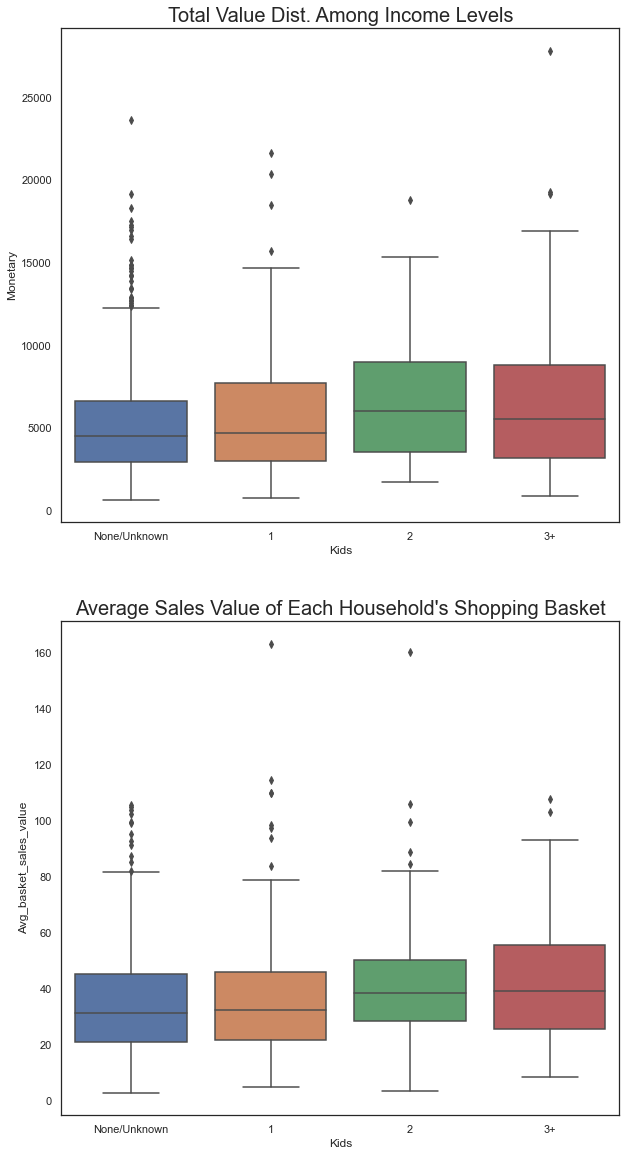

In [16]:
# Examining how raising childre  affects both monetary value and average basket sales value
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,20))

sns.boxplot(x='Kids', y='Monetary', data=new_data, ax=ax1)
ax1.set_title('Total Value Dist. Among Income Levels', fontsize=20)
sns.boxplot(y='Avg_basket_sales_value', x='Kids', data=new_data, ax=ax2)
ax2.set_title("Average Sales Value of Each Household's Shopping Basket", fontsize=20);

As expected, the total value and average sales value for a household grows as the number of children in the home grow.  However this trend seems to reverse itself once a home has 3 or more children.  

This is likely a result of outside factors that come with raising multiple children, rather than as a direct result of the number of children in a household.   The exact cause of this is outside the scope of this project.

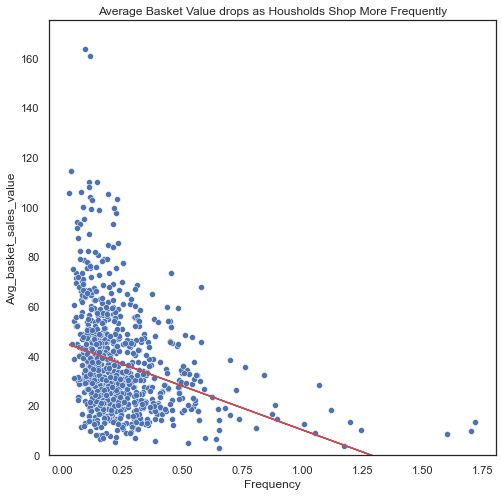

In [17]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Frequency', y='Avg_basket_sales_value', data=new_data)
x=new_data.Frequency
y=new_data.Avg_basket_sales_value
a, b = np.polyfit(x, y, 1)
plt.plot(x, (a*x + b), c='r')
plt.ylim(0,175)
plt.title('Average Basket Value drops as Housholds Shop More Frequently');

Unsurprisingly, the average sales value of a given household per visit falls as that household shops more frequently.

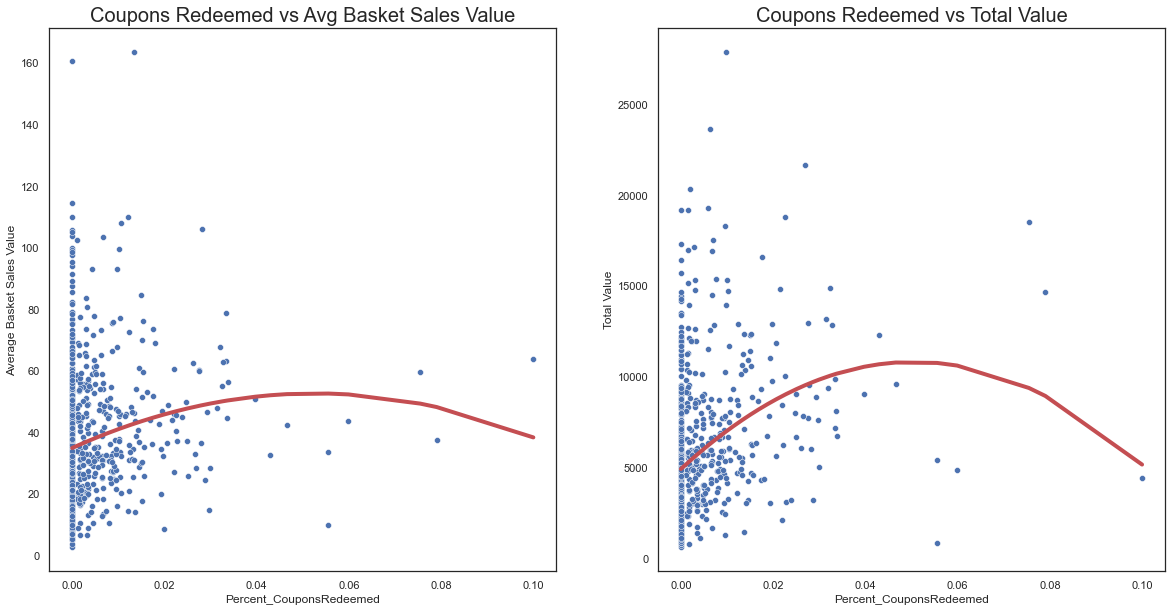

In [18]:
x=new_data.Percent_CouponsRedeemed
y=new_data.Avg_basket_sales_value
z=new_data.Monetary
a, b, c=np.polyfit(x,y,2)
d, e, f=np.polyfit(x,z,2)
k = (a*(x*x) + b*x + c)
j = (d*(x*x) + e*x + f)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
sns.lineplot(x=x, y=k, ax=ax1, color='r', linewidth=4)
sns.scatterplot(x=x, y=y, ax=ax1)
ax1.set_title('Coupons Redeemed vs Avg Basket Sales Value', fontsize=20)
ax1.set_ylabel('Average Basket Sales Value')
sns.lineplot(x=x, y=j, ax=ax2, color='r', linewidth=4)
sns.scatterplot(x=x, y=z, ax=ax2)
ax2.set_title('Coupons Redeemed vs Total Value', fontsize=20)
ax2.set_ylabel('Total Value');

Surprisingly the average basket value and the total value of a household are not negatively correlated with the percent of coupons a household redeem.  In fact, the value seems to climb up to a certain point at around 5 percent coupon redemption, at which point it begins to fall as households redeem a higher percentage of coupons. While this trend is more pronounced with a household's total value, it is consistent for the average sales value as well.

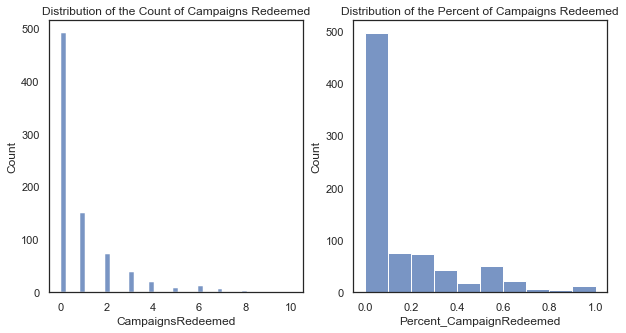

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

sns.histplot(x='CampaignsRedeemed', data=new_data, ax=ax1)
ax1.set_title('Distribution of the Count of Campaigns Redeemed')
sns.histplot(x='Percent_CampaignRedeemed', data=new_data, ax=ax2, bins=10)
ax2.set_title('Distribution of the Percent of Campaigns Redeemed');

Both the count and percent of campaigns redeemd have similar distributions, however the skew of the distribution is more pronounced when examining specifically the count of campaigns which are redeemed. 

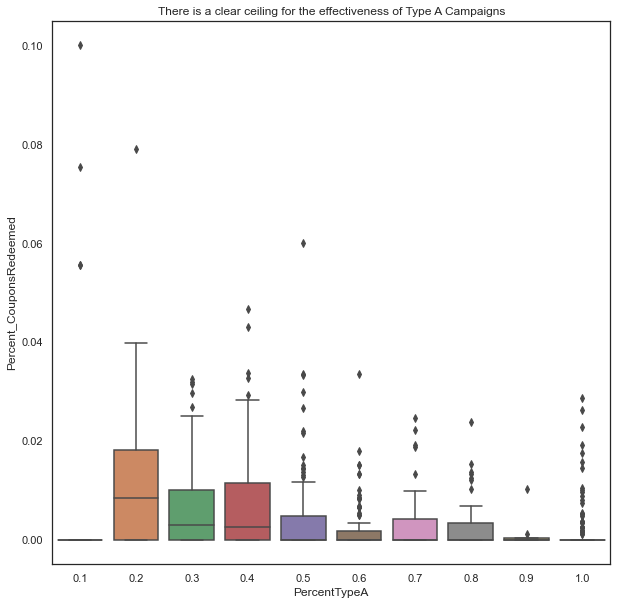

In [45]:
x=new_data.PercentTypeA
w = pd.cut(x, 10, labels=['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8', '0.9', '1.0'])
y=new_data.Percent_CouponsRedeemed

plt.figure(figsize=(10,10))
sns.boxplot(x=w, y=y, )

plt.title('There is a clear ceiling for the effectiveness of Type A Campaigns');

While for the majority of households the percent of campaigns sent to them which are Type A is not impactful on the percent of coupons sent which they redeem; it should be noted that no houshold redeemed more than 4 percent of their coupons unless Type A campaigns were less than 50% of the campaigns sent to them.

This could indicate that the 'shotgun' mail advertising campaigns which are Type A are effective, but only up to a certain point. 

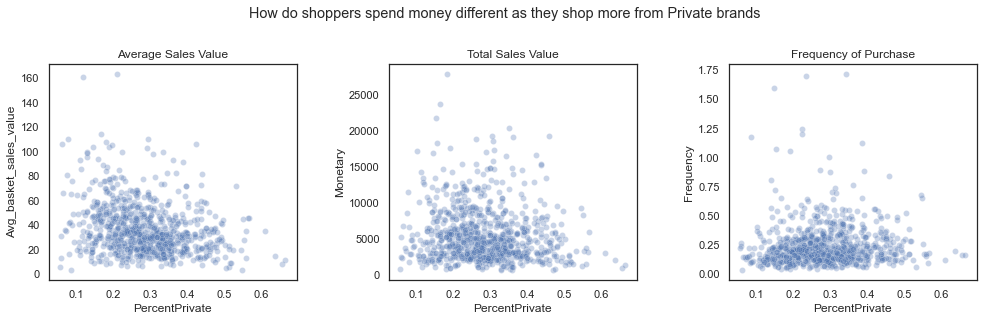

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
fig.tight_layout(pad=5)
fig.suptitle('How do shoppers spend money different as they shop more from Private brands')
sns.scatterplot(x='PercentPrivate', y='Avg_basket_sales_value', data=new_data, ax=ax1, alpha=0.3)
ax1.set_title('Average Sales Value')
sns.scatterplot(x='PercentPrivate', y='Frequency', data=new_data, ax=ax3, alpha=0.3)
ax3.set_title('Frequency of Purchase')
sns.scatterplot(x='PercentPrivate', y='Monetary', data=new_data, ax=ax2, alpha=0.3)
ax2.set_title('Total Sales Value');

There doesn't seem to be a significant relationship between how many of a housholds products are purchased from private brands and the total value or frequency with which housholds purchase from this store. 

However, there does appear to be a sligh negative correlation between private brands and the average sales value.  This is something that could be investigated more to see if perhaps this is reflected in the number of products, quantity of products, or departments shopped in. 

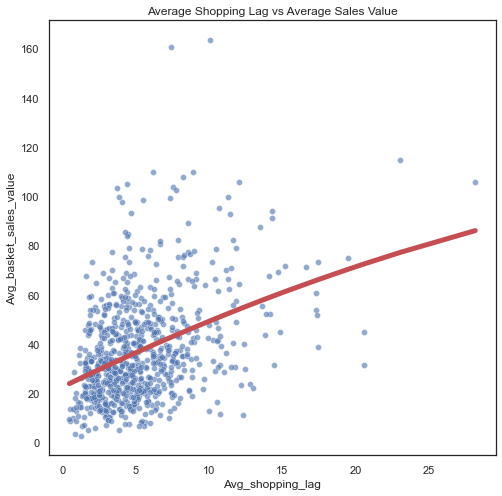

In [22]:
x=new_data.Avg_shopping_lag
y=new_data.Avg_basket_sales_value
a, b, c = np.polyfit(x, y, 2)
z = (a*(x*x) + b*x + c)
plt.figure(figsize=(8,8))
sns.scatterplot(x=x, y=y, alpha=0.6)
sns.lineplot(x=x, y=z, linewidth=5, color='r')
plt.title('Average Shopping Lag vs Average Sales Value');

Unsurprisingly, as the time between shopping visits to the store increase, so to does the average shopping basket value of a given houshold. 

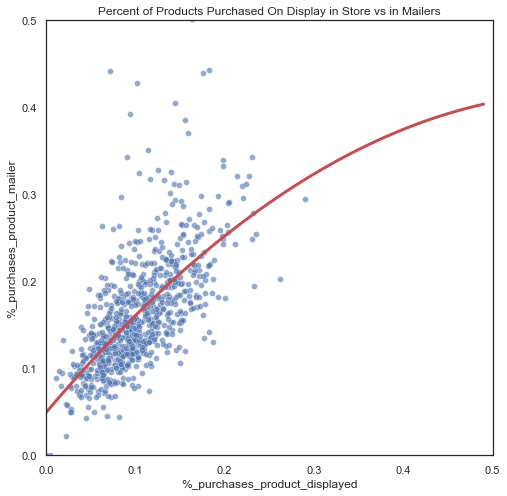

In [23]:
x=new_data['%_purchases_product_displayed']
y=new_data['%_purchases_product_mailer']
a, b, c = np.polyfit(x, y, 2)
k = np.arange(0, 0.5, 0.01)
z = (a*(k*k) + b*k + c)
plt.figure(figsize=(8,8))
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
sns.scatterplot(x=x, y=y, alpha=0.6)
sns.lineplot(x=k, y=z, linewidth=3, color='r')
plt.title('Percent of Products Purchased On Display in Store vs in Mailers');

Rather surprisingly, there are more products purchased which are on display in the mailers sent to households than those which are displayed in the store.  

This is something that could also be examined in more detail with different segments, and should be compared to the percent of total products displayed in both the mailer and store as well. This trend is slight enough that if the ratio of products that are actually displayed in either place in a given week is taken into account it may eliminate the trend.

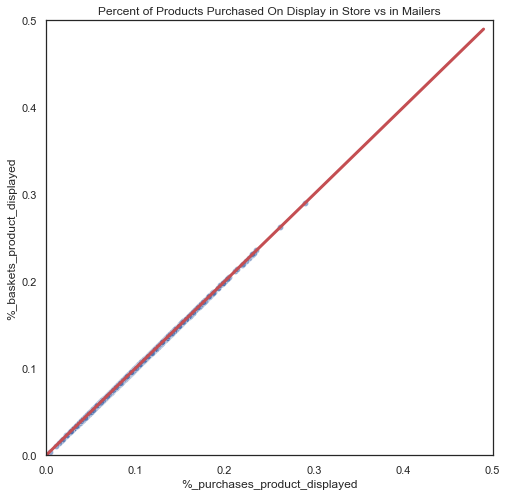

In [24]:
x=new_data['%_purchases_product_displayed']
y=new_data['%_baskets_product_displayed']
b, c = np.polyfit(x, y, 1)
k = np.arange(0, 0.5, 0.01)
z = (b*k + c)
plt.figure(figsize=(8,8))
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
sns.scatterplot(x=x, y=y, alpha=0.6)
sns.lineplot(x=k, y=z, linewidth=3, color='r')
plt.title('Percent of Products Purchased On Display in Store vs in Mailers');

The percent of products displayed which were purchsed is perfectly correlated with the percent of baskets which have an item in them which is displayed.  This means that I'll need to drop the second feature, and it's twin %_purchases_product_mailer.

### Conclusions:

There were several key takeaways from this exploration:


1. Several features displayed colinearity.  Since including all of these features will give weight to those aspects of a household which these features represent I'm going to drop these features during pre-processing:
- %_baskets_product_mailer
- %_baskets_product_displayed
- Last_active_day


2. The average discount from specifically loyalty cards (rather than mailed coupons) is strongly correlated with the average sales value of a basket. While this doesn't provide significant insight into how to approach clustering for customer segmentation, this is important to note since further exploration could examine this relationship in more detail and identify opportunities to grow revenue.


3. The percentage of purchases made from a Private brand (vs National) shows little correlation to any features other than the percentage of products purchased that were prominently displayed in the store or in the mailers.  This could indicate that households which are more likely to purchase from a Private brand are also influenced by marketing and merchandising efforts, or it could mean that products which are advertised are purchased more frequently.  This is also outside the scope of this project but could provide valube insights into revenue for both the store and private brands. Particularly so since there is a correlation between households purchasing from private brands and having a lower than average sales value.


4. In general as income rises so too does average sales value and total value of a household. The income group from 200-249k showed a significant drop in total value of each household from the trend, however that drop was not reflected in the average sales value. This could be something that is reflected in clustering, and will be interesting to keep an eye on.


5. The total number of campaigns sent to a household was strongly associated with the number of distinct products a household purchased, as well as their total value.  However, no household redeemed more than 4 percent of thier coupons unless type A campaigns (the mailers with all of the coupons in them) made up less than 50% of the campaigns mailed to a household.  No household redeemed over 10% of the coupons which where mailed out, although several redeemed coupons from every campaign which was mailed out. 


6. There is a sweet spot for coupon redemtion where a households average sales value and total value are maximized, which is around 5% coupon redemption.


7. It's notable that a household's maximum number of items in a basket is much more strongly correlated to the average number of items in a basket than it is to the minimum. It is also not strongly correlated with the average sales value of a household at all.  I believe that this is another sign of the households discovered in the previous notebook which make excessively large purchases, and may potentially be corporate clients.  
